In [1]:
#conpoents的应用

from sklearn.datasets import fetch_lfw_people#7个人的1000多张人脸图片组成的一组人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)#实例化   min_faces_per_person=60：每个人取出60张脸图
faces#一个字典形式的数据

{'data': array([[ 76.666664 ,  82.333336 ,  91.333336 , ...,  34.333332 ,
          30.666666 ,  28.333334 ],
        [ 40.       ,  48.       ,  81.666664 , ..., 118.666664 ,
         209.66667  , 239.33333  ],
        [ 51.333332 ,  63.       ,  82.       , ..., 252.33333  ,
         251.33333  , 250.       ],
        ...,
        [ 73.       ,  78.666664 ,  84.666664 , ...,  73.       ,
          58.       ,  54.666668 ],
        [102.666664 , 102.       , 102.       , ..., 234.66667  ,
         230.33333  , 226.33333  ],
        [  1.3333334,   2.       ,   3.3333333, ...,  64.333336 ,
          33.666668 ,   6.6666665]], dtype=float32),
 'images': array([[[ 76.666664 ,  82.333336 ,  91.333336 , ..., 113.666664 ,
           92.333336 ,  97.333336 ],
         [ 74.666664 ,  84.       ,  94.       , ..., 111.333336 ,
           94.666664 ,  95.       ],
         [ 79.       ,  90.       ,  99.       , ..., 113.666664 ,
          101.333336 ,  99.       ],
         ...,
         [ 15.

In [3]:
faces.images

array([[[ 76.666664 ,  82.333336 ,  91.333336 , ..., 113.666664 ,
          92.333336 ,  97.333336 ],
        [ 74.666664 ,  84.       ,  94.       , ..., 111.333336 ,
          94.666664 ,  95.       ],
        [ 79.       ,  90.       ,  99.       , ..., 113.666664 ,
         101.333336 ,  99.       ],
        ...,
        [ 15.       ,  16.333334 ,  18.333334 , ...,  38.       ,
          34.       ,  30.333334 ],
        [ 15.       ,  16.333334 ,  17.666666 , ...,  36.666668 ,
          31.333334 ,  28.333334 ],
        [ 15.333333 ,  15.333333 ,  17.333334 , ...,  34.333332 ,
          30.666666 ,  28.333334 ]],

       [[ 40.       ,  48.       ,  81.666664 , ...,  33.666668 ,
          28.333334 ,  24.       ],
        [ 62.       ,  72.333336 ,  97.333336 , ...,  52.666668 ,
          45.333332 ,  38.333332 ],
        [ 92.       ,  74.333336 , 100.666664 , ...,  68.666664 ,
          66.       ,  55.       ],
        ...,
        [  3.6666667,   4.       ,   3.6666667, ...,  

In [4]:
faces.images.shape
#怎样理解这个数据的维度？ 639是矩阵中图像的个数，62是每个图像的特征矩阵的行，47是每个图像的特征矩阵的列

(639, 62, 47)

In [5]:
faces.data.shape#（639,2914）   行是样本，列是样本相关的所有特征：2914 = 62 * 47

(639, 2914)

In [7]:
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

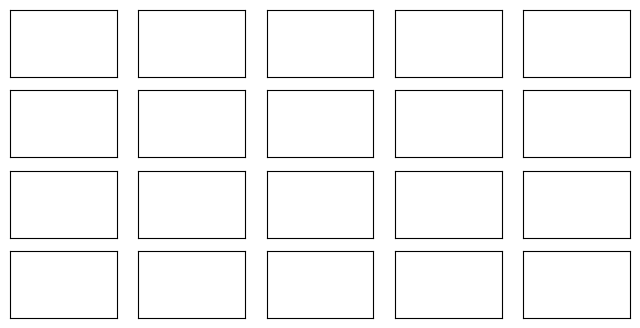

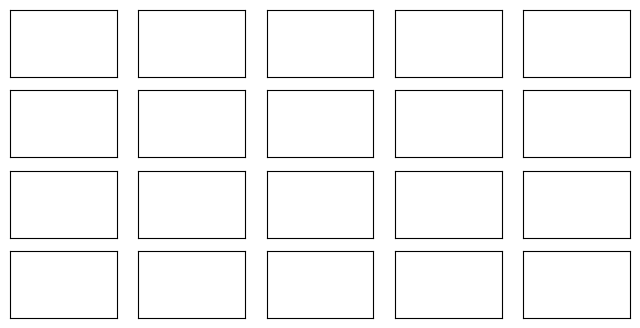

In [8]:
#数据本身是图像，和数据本身只是数字，MNIST数据本事其实是数字，就需要把它转化为图像，使用的可视化方法不同
 
#创建画布和子图对象
fig, axes = plt.subplots(4,5#4行5列个图
                        ,figsize=(8,4)#figsize指的是图的尺寸
                        ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                        )
fig#指的是画布

In [9]:
axes
#不难发现，axes中的一个对象对应fig中的一个空格

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [10]:
#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环
axes.shape#（4,5）
 
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的四个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用 子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环

# [*axes.flat]#2维

(4, 5)

In [11]:
axes.flat#降低一个维度
# [*axes.flat] #1维

In [12]:
#enumerate(axes.flat)
 
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] 
              ,cmap="gray" )#选择色彩的模式

In [13]:
#原本有2900维，我们现在来降到150维
pca = PCA(150).fit(X)#这里X = faces.data，不是faces.images.shape ,因为sklearn只接受2维数组降，不接受高维数组降
V = pca.components_#新特征空间
V.shape#V（k，n）   (150, 2914)

(150, 2914)

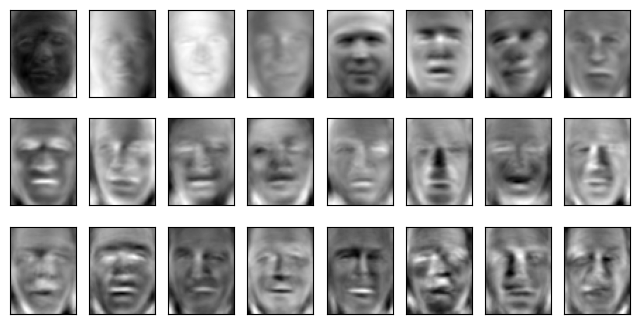

In [14]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
 
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")

In [15]:
#使用inverse实现维度逆转

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [16]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
#怎样理解这个数据的维度？

(639, 62, 47)

In [17]:
X = faces.data
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？

(639, 2914)

In [18]:
pca = PCA(150)#实例化
X_dr = pca.fit_transform(X)#拟合+提取结果
X_dr.shape


(639, 150)

In [19]:
X_inverse = pca.inverse_transform(X_dr)
 
X_inverse.shape#(1348, 2914)

faces.images.shape#(1348, 62, 47)

(639, 62, 47)

In [20]:
faces.images.shape

(639, 62, 47)

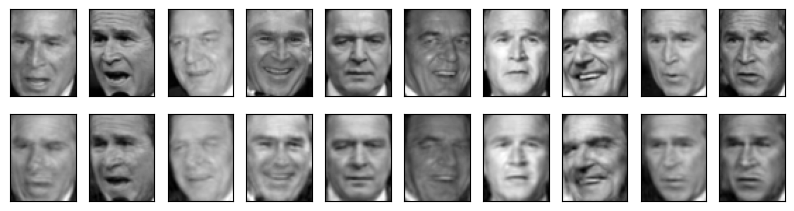

In [21]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                      ,subplot_kw={"xticks":[],"yticks":[]}
                     )
 
#和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
#那在这里，我们使用怎样的循环？
#现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
 
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")


In [23]:
#使用inverse实现降噪

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
digits.data.shape

(1797, 64)

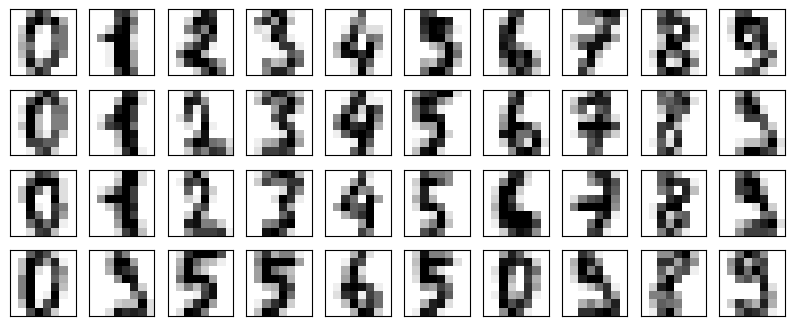

In [24]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                           ,subplot_kw = {"xticks":[],"yticks":[]}
                           )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
        
plot_digits(digits.data)

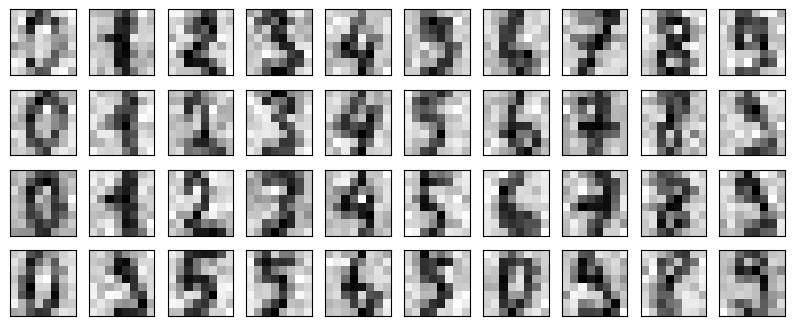

In [25]:
np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [26]:
pca = PCA(0.5).fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

(1797, 6)

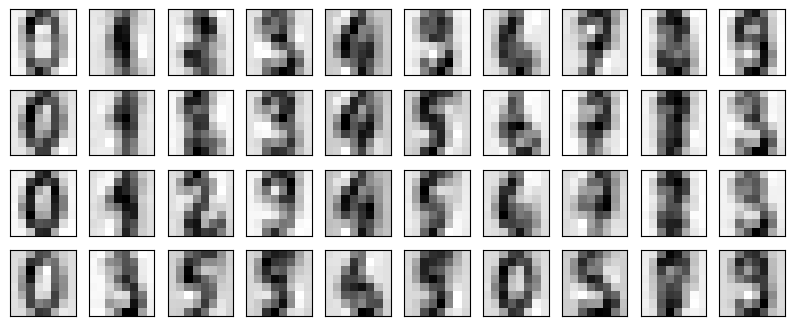

In [27]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)